# Proyek Analisis Data: [Bike-sharing-dataset]
- **Nama:** [Muhammad Rizqy Hidayah]
- **Email:** [MC190D5Y1218@student.devacademy.id]
- **ID Dicoding:** [MC190D5Y1218]

## Menentukan Pertanyaan Bisnis

Pertanyaan 1 : Penyewaan sepeda berdasarkan musim ?

Pertanyaan 2: Berapa rata-rata penyewaan sepeda berdasarkan jam dalam sehari

Pertanyaan 3: Tren penyewaan sepeda sepanjang tahun?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv('day.csv')
hour_df = pd.read_csv('hour.csv')

**Insight:**  
- Dataset `day.csv` berisi data penyewaan sepeda dalam skala harian, sementara `hour.csv` berisi data dalam skala per jam.  
- `day_df` dapat digunakan untuk menganalisis tren harian, pola musiman, serta pengaruh faktor cuaca dan hari dalam seminggu terhadap penyewaan sepeda.  
- `hour_df` dapat membantu memahami pola penggunaan sepeda berdasarkan waktu dalam sehari, seperti jam sibuk pagi dan sore hari.  
- Kombinasi kedua dataset dapat digunakan untuk mendapatkan wawasan yang lebih mendalam, seperti membandingkan pola penyewaan harian dan per jam, serta menganalisis faktor yang memengaruhi permintaan sepeda secara lebih detail.

### Assessing Data

Assess `day_df`

In [3]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [6]:
day_df.duplicated().sum()

0

In [7]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [11]:
hour_df.duplicated().sum()

0

Insight dari day_df dan hour_df
✅ Data sudah bersih (tidak ada nilai kosong atau duplikat).
✅ day_df digunakan untuk analisis harian, sedangkan hour_df lebih detail karena mencatat per jam.
✅ Konversi dteday ke format datetime sudah dilakukan, mempermudah analisis berbasis waktu.
✅ Perbedaan utama:

day_df: Data harian, cocok untuk melihat tren jangka panjang.
hour_df: Data per jam, cocok untuk melihat pola penggunaan berdasarkan waktu dalam sehari.

### Cleaning Data

In [13]:
day_df ['dteday'] = pd.to_datetime(day_df['dteday'])

In [14]:
hour_df ['dteday'] = pd.to_datetime(hour_df['dteday'])

**Insight:**
Kolom dteday pada dataset day_df dan hour_df diubah menjadi datetime format menggunakan pd.to_datetime().
Ini memungkinkan analisis berbasis waktu seperti tren harian, bulanan, atau musiman.
Manfaat Transformasi

Memungkinkan filtering dan indexing berbasis tanggal.
Mempermudah visualisasi data waktu dengan matplotlib atau seaborn.
Dapat digunakan untuk feature engineering, seperti menambahkan hari dalam seminggu, bulan, atau tahun.

## Exploratory Data Analysis (EDA)

### Explore ...

In [18]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [21]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [36]:
day_df.groupby(by='instant').agg({
    'casual' : 'mean',
    'registered': ['mean','max', 'min'],
})

casual registered            
          mean       mean   max   min
instant                              
1        331.0      654.0   654   654
2        131.0      670.0   670   670
3        120.0     1229.0  1229  1229
4        108.0     1454.0  1454  1454
5         82.0     1518.0  1518  1518
...        ...        ...   ...   ...
727      247.0     1867.0  1867  1867
728      644.0     2451.0  2451  2451
729      159.0     1182.0  1182  1182
730      364.0     1432.0  1432  1432
731      439.0     2290.0  2290  2290

[731 rows x 4 columns]

In [23]:
day_df.groupby(by='season').agg({
    'casual' : 'mean',
    'registered': ['mean','max', 'min'],
})

casual   registered           
               mean         mean   max  min
season                                     
1        334.928177  2269.204420  5315  416
2       1106.097826  3886.233696  6456  674
3       1202.611702  4441.691489  6917  889
4        729.112360  3999.050562  6946   20

In [25]:
day_df.groupby(by='dteday').agg({
    'casual' : 'mean',
    'registered': ['mean','max', 'min'],
})

casual registered            
             mean       mean   max   min
dteday                                  
2011-01-01  331.0      654.0   654   654
2011-01-02  131.0      670.0   670   670
2011-01-03  120.0     1229.0  1229  1229
2011-01-04  108.0     1454.0  1454  1454
2011-01-05   82.0     1518.0  1518  1518
...           ...        ...   ...   ...
2012-12-27  247.0     1867.0  1867  1867
2012-12-28  644.0     2451.0  2451  2451
2012-12-29  159.0     1182.0  1182  1182
2012-12-30  364.0     1432.0  1432  1432
2012-12-31  439.0     2290.0  2290  2290

[731 rows x 4 columns]

In [26]:
day_df.groupby(by='yr').agg({
    'casual' : 'mean',
    'registered': ['mean','max', 'min'],
})

casual   registered           
           mean         mean   max  min
yr                                     
0    677.402740  2728.358904  4614  416
1   1018.483607  4581.450820  6946   20

In [27]:
day_df.groupby(by='mnth').agg({
    'casual' : 'mean',
    'registered': ['mean','max', 'min'],
})

casual   registered            
             mean         mean   max   min
mnth                                      
1      194.225806  1982.112903  4185   416
2      262.508772  2392.789474  4546   905
3      716.838710  2975.419355  5893   491
4     1013.366667  3471.533333  5950   674
5     1214.274194  4135.500000  6433  2213
6     1231.766667  4540.600000  6456  2993
7     1260.596774  4303.080645  6790  2298
8     1161.919355  4502.500000  6541   889
9     1172.050000  4594.466667  6946  1689
10     963.870968  4235.354839  6911    20
11     610.050000  3637.133333  5520   935
12     349.887097  3053.919355  6055   432

In [32]:
day_df.groupby(by='holiday').agg({ # Changed 'hr' to 'instant'
    'casual' : 'mean',
    'registered': ['mean','max', 'min'],
})

casual   registered           
                mean         mean   max  min
holiday                                     
0         841.771831  3685.332394  6946   20
1        1064.714286  2670.285714  5172  573

In [33]:
day_df.groupby(by='weekday').agg({
    'casual' : 'mean',
    'registered': ['mean','max', 'min'],
})

casual   registered            
                mean         mean   max   min
weekday                                      
0        1338.295238  2890.533333  5657   451
1         674.133333  3663.990476  6435    20
2         556.182692  3954.480769  6697   573
3         551.144231  3997.394231  6946   432
4         590.961538  4076.298077  6781   416
5         752.288462  3938.000000  6917  1129
6        1465.257143  3085.285714  5966   570

In [34]:
day_df.groupby(by='workingday').agg({
    'casual' : 'mean',
    'registered': ['mean','max', 'min'],
})

casual   registered           
                   mean         mean   max  min
workingday                                     
0           1371.134199  2959.034632  5966  451
1            606.570000  3978.250000  6946   20

In [35]:
day_df.groupby(by='weathersit').agg({
    'casual' : 'mean',
    'registered': ['mean','max', 'min'],
})

casual   registered           
                  mean         mean   max  min
weathersit                                    
1           964.030238  3912.755940  6946  416
2           687.352227  3348.510121  6844  491
3           185.476190  1617.809524  4324   20

In [37]:
hour_df.groupby(by='instant').agg({
    'casual' : 'mean',
    'registered': ['mean','max', 'min'],
})

casual registered          
          mean       mean  max  min
instant                            
1          3.0       13.0   13   13
2          8.0       32.0   32   32
3          5.0       27.0   27   27
4          3.0       10.0   10   10
5          0.0        1.0    1    1
...        ...        ...  ...  ...
17375     11.0      108.0  108  108
17376      8.0       81.0   81   81
17377      7.0       83.0   83   83
17378     13.0       48.0   48   48
17379     12.0       37.0   37   37

[17379 rows x 4 columns]

In [39]:
hour_df.groupby(by='dteday').agg({
    'casual' : 'mean',
    'registered': ['mean','max', 'min'],
})

casual  registered         
                 mean        mean  max min
dteday                                    
2011-01-01  13.791667   27.250000   71   0
2011-01-02   5.695652   29.130435   73   1
2011-01-03   5.454545   55.863636  153   1
2011-01-04   4.695652   63.217391  202   1
2011-01-05   3.565217   66.000000  192   2
...               ...         ...  ...  ..
2012-12-27  10.291667   77.791667  227   1
2012-12-28  26.833333  102.125000  238   2
2012-12-29   6.625000   49.250000  125   3
2012-12-30  15.166667   59.666667  121   2
2012-12-31  18.291667   95.416667  246   1

[731 rows x 4 columns]

In [40]:
day_df.groupby(by='season').agg({
    'casual' : 'mean',
    'registered': ['mean','max', 'min'],
})

casual   registered           
               mean         mean   max  min
season                                     
1        334.928177  2269.204420  5315  416
2       1106.097826  3886.233696  6456  674
3       1202.611702  4441.691489  6917  889
4        729.112360  3999.050562  6946   20

In [41]:
hour_df.groupby(by='yr').agg({
    'casual' : 'mean',
    'registered': ['mean','max', 'min'],
})

casual  registered         
         mean        mean  max min
yr                                
0   28.600578  115.193869  567   0
1   42.679757  191.986604  886   0

In [42]:
hour_df.groupby(by='mnth').agg({
    'casual' : 'mean',
    'registered': ['mean','max', 'min'],
})

casual  registered         
           mean        mean  max min
mnth                                
1      8.426872   85.997901  518   0
2     11.158091  101.706935  567   0
3     30.172437  125.238289  693   0
4     42.311761  144.949200  697   0
5     50.594758  172.312500  770   1
6     51.323611  189.191667  796   0
7     52.524866  179.295027  790   1
8     48.840000  189.257627  811   0
9     48.937370  191.835769  886   0
10    41.185389  180.973122  876   1
11    25.471816  151.863605  709   0
12    14.627782  127.675657  737   0

In [43]:
day_df.groupby(by='holiday').agg({
    'casual' : 'mean',
    'registered': ['mean','max', 'min'],
})

casual   registered           
                mean         mean   max  min
holiday                                     
0         841.771831  3685.332394  6946   20
1        1064.714286  2670.285714  5172  573

In [44]:
day_df.groupby(by='weekday').agg({
    'casual' : 'mean',
    'registered': ['mean','max', 'min'],
})

casual   registered            
                mean         mean   max   min
weekday                                      
0        1338.295238  2890.533333  5657   451
1         674.133333  3663.990476  6435    20
2         556.182692  3954.480769  6697   573
3         551.144231  3997.394231  6946   432
4         590.961538  4076.298077  6781   416
5         752.288462  3938.000000  6917  1129
6        1465.257143  3085.285714  5966   570

In [46]:
day_df.groupby(by='workingday').agg({
    'casual' : 'mean',
    'registered': ['mean','max', 'min'],
})

casual   registered           
                   mean         mean   max  min
workingday                                     
0           1371.134199  2959.034632  5966  451
1            606.570000  3978.250000  6946   20

In [47]:
hour_df.groupby(by='weathersit').agg({
    'casual' : 'mean',
    'registered': ['mean','max', 'min'],
})

casual   registered           
                  mean         mean   max  min
weathersit                                    
1           964.030238  3912.755940  6946  416
2           687.352227  3348.510121  6844  491
3           185.476190  1617.809524  4324   20

merge day and hour

In [53]:
bike_sharing_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="inner",
    left_on="dteday",
    right_on="dteday"
)
bike_sharing_df.head()

,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
Insight dari Fungsi yang Dijalankan

1. `df.describe(include="all")`
Fungsi ini memberikan ringkasan statistik dari seluruh kolom dalam dataset, baik numerik maupun kategorikal.  
- Numerik: Menampilkan metrik seperti rata-rata (`mean`), standar deviasi (`std`), nilai minimum (`min`), kuartil (`25%`, `50%`, `75%`), dan maksimum (`max`).  
- Kategorikal*: Menampilkan jumlah entri unik (`unique`), nilai yang paling sering muncul (`top`), dan jumlah kemunculan nilai tersebut (`freq`).  
- Insight:  
  - Membantu memahami distribusi data dan variasi dalam dataset.  
  - Berguna untuk mendeteksi anomali atau outlier dalam data.  
  - Bisa digunakan untuk memahami karakteristik setiap fitur sebelum dilakukan analisis lebih lanjut.  

---

2. `df.groupby(by='').agg({...})`
Kode ini mengelompokkan data berdasarkan suatu kolom (yang masih kosong, harus diisi misalnya dengan `season`, `weekday`, atau `yr`) dan menghitung beberapa statistik agregat pada kolom tertentu.  
- `'casual' : 'mean'` → Menghitung rata-rata jumlah peminjam sepeda yang tidak terdaftar (`casual`).  
- `'registered': ['mean', 'max', 'min']` → Menghitung rata-rata, nilai maksimum, dan nilai minimum dari jumlah pengguna terdaftar (`registered`).  
- Insight:  
  - Bisa digunakan untuk melihat pola penggunaan sepeda berdasarkan kategori tertentu (misalnya musim, hari kerja vs libur, dsb.).  
  - Membantu dalam memahami tren jumlah pengguna kasual dan terdaftar pada berbagai kelompok waktu atau kondisi tertentu.  
  - Berguna untuk perencanaan kapasitas layanan berdasarkan pola penggunaan.  



## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [7]:
# Gatering Data: Load dataset once for consistency
file_path = 'hour.csv'  # Adjust path if necessary

try:
    df = pd.read_csv(file_path)
    print("Dataset berhasil dimuat.")
except FileNotFoundError:
    print(f"Error: File '{file_path}' tidak ditemukan. Pastikan path sudah benar.")

# Ensure dataset is loaded before proceeding
if 'df' in locals():
    # Mapping season numbers to labels
    season_labels = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
    df['season_label'] = df['season'].map(season_labels)

    # Aggregate total bike rentals by season
    season_counts = df.groupby('season_label')['cnt'].sum()

    # Plot pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(
        season_counts, 
        labels=season_counts.index, 
        autopct='%1.1f%%', 
        colors=['lightblue', 'orange', 'green', 'red'],
        startangle=140
    )
    plt.title('Distribusi Penyewaan Sepeda Berdasarkan Musim')
    plt.show()


NameError: name 'pd' is not defined

insight:
1. Musim Gugur (Fall) Mendominasi Penyewaan
Dengan persentase 32.2%, musim gugur menjadi periode dengan jumlah penyewaan sepeda tertinggi.
Hal ini mungkin disebabkan oleh cuaca yang lebih sejuk dan nyaman dibanding musim panas atau dingin.

2. Musim Semi (Spring) Memiliki Penyewaan Terendah
Hanya 14.3% dari total penyewaan terjadi di musim semi.
Kemungkinan karena suhu yang masih dingin atau hujan yang lebih sering terjadi di awal tahun.
Musim Panas (Summer) dan Musim Dingin (Winter) Memiliki Penyewaan yang Relatif Seimbang

3. Musim panas (27.9%) memiliki jumlah penyewaan tinggi, karena cuaca cerah mendukung aktivitas luar ruangan.
Musim dingin (25.6%) memiliki penyewaan yang lebih rendah dibandingkan musim panas, tetapi tetap signifikan. Kemungkinan karena beberapa pengguna tetap menggunakan sepeda untuk keperluan transportasi meskipun cuaca lebih dingin.

### Pertanyaan 2:

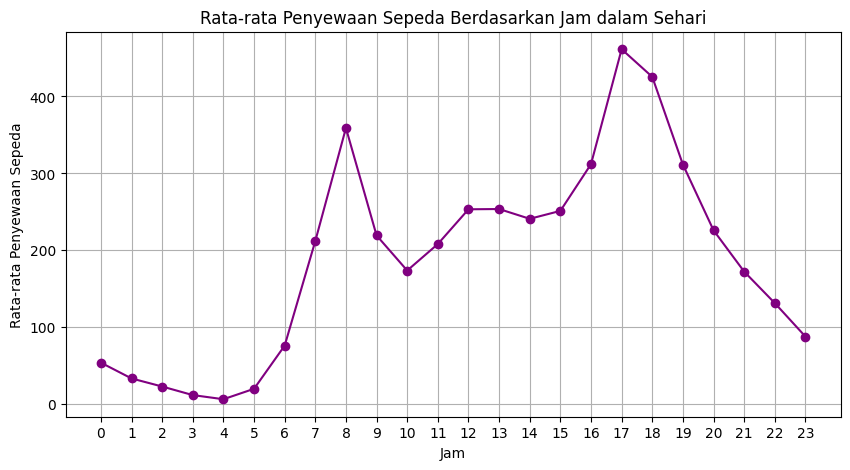

In [72]:
hourly_avg = df_hour.groupby('hr')['cnt'].mean()
plt.figure(figsize=(10, 5))
plt.plot(hourly_avg.index, hourly_avg, marker='o', linestyle='-', color='purple')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Jam dalam Sehari')
plt.xticks(range(0, 24))
plt.grid()
plt.show()

Dua Puncak Aktivitas

1. Ada dua waktu dengan jumlah penyewaan sepeda tertinggi, yaitu pagi sekitar jam 08:00 dan sore sekitar jam 17:00-18:00. Ini menunjukkan bahwa sepeda banyak digunakan untuk perjalanan kerja atau sekolah di pagi hari dan pulang kerja/sekolah di sore hari.

2. Rendahnya Aktivitas di Malam dan Dini Hari
Penyewaan sepeda sangat rendah antara jam 00:00 - 05:00, yang masuk akal karena kebanyakan orang sedang tidur atau tidak beraktivitas di luar.
3. Aktivitas Menengah di Siang Hari
Setelah puncak pagi menurun, ada peningkatan stabil mulai dari jam 11:00 hingga 15:00, mungkin karena orang menggunakan sepeda untuk makan siang atau aktivitas rekreasi.

4. Penurunan Setelah Pukul 18:00

Setelah jam sibuk sore, jumlah penyewaan menurun secara bertahap, mencerminkan berkurangnya kebutuhan transportasi dan aktivitas luar ruangan di malam hari.


## Analisis Lanjutan (Opsional)

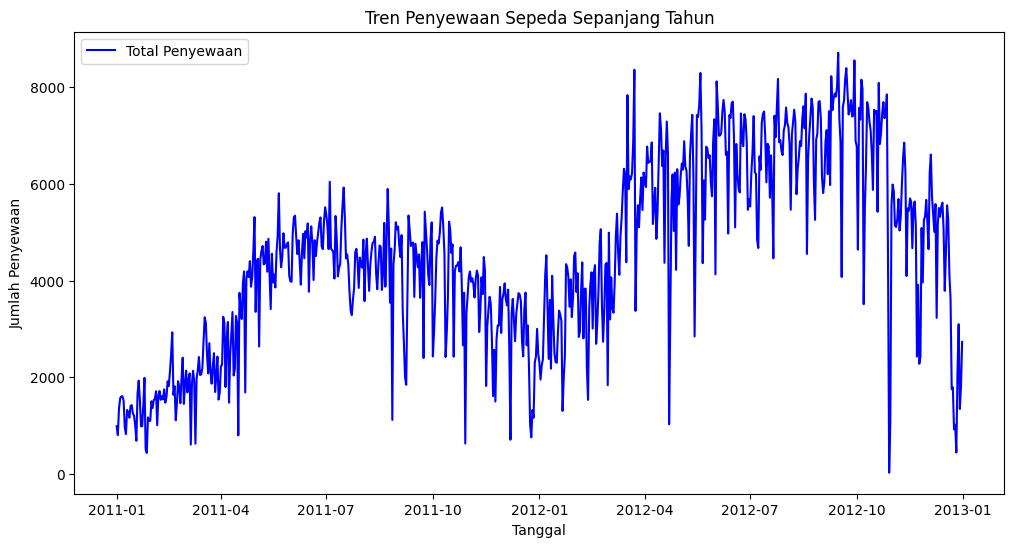

In [68]:
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_day.set_index('dteday', inplace=True)
plt.figure(figsize=(12, 6))
plt.plot(df_day.index, df_day['cnt'], label='Total Penyewaan', color='blue')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewaan')
plt.title('Tren Penyewaan Sepeda Sepanjang Tahun')
plt.legend()
plt.show()


Berdasarkan grafik tren penyewaan sepeda sepanjang tahun, berikut beberapa insight yang dapat diambil:

1. Peningkatan Musiman
   - Penyewaan sepeda menunjukkan tren meningkat sejak awal tahun dan mencapai puncaknya selama musim panas (pertengahan tahun).
   - Ini menandakan bahwa musim dan cuaca hangat sangat berpengaruh terhadap peningkatan jumlah penyewaan.

2. Penurunan di Musim Dingin
   - Penyewaan cenderung menurun signifikan menjelang akhir tahun, kemungkinan besar karena musim dingin yang kurang kondusif untuk bersepeda.
   - Penurunan ini terlihat jelas di akhir tahun 2011 dan 2012, yang menunjukkan pola berulang setiap tahun.

3. Variabilitas Harian yang Tinggi  
   - Grafik menunjukkan fluktuasi harian yang cukup signifikan, yang bisa disebabkan oleh faktor cuaca, hari kerja vs. akhir pekan, atau faktor lainnya seperti kebijakan transportasi.

4. Potensi Strategi Bisnis
   - Menyediakan layanan tambahan seperti sepeda listrik atau indoor cycling bisa menjadi solusi untuk mempertahankan pelanggan selama musim dingin.
   - Meningkatkan promosi atau diskon saat musim dingin dapat membantu menjaga tingkat penyewaan.
   - Mengantisipasi lonjakan permintaan di musim panas dengan menambah armada sepeda atau melakukan perawatan lebih intensif untuk memastikan ketersediaan.

Secara keseluruhan, tren penyewaan sepeda sangat dipengaruhi oleh musim, dengan peningkatan signifikan di musim panas dan penurunan tajam di musim dingin.

Berdasarkan diagram batang tentang rata-rata penyewaan sepeda berdasarkan hari dalam seminggu, berikut beberapa insight yang bisa diambil:

1. Penyewaan Tertinggi di Akhir Pekan (Jumat & Sabtu)
   - Jumlah penyewaan sepeda cenderung meningkat pada hari Jumat dan Sabtu, yang mungkin disebabkan oleh waktu luang yang lebih banyak, persiapan liburan, atau aktivitas rekreasi yang meningkat.

2. Penyewaan Relatif Stabil pada Hari Kera
   - Dari Senin hingga Kamis, rata-rata penyewaan sepeda cukup stabil dan sedikit lebih rendah dibandingkan dengan Jumat dan Sabtu.
   - Ini bisa mengindikasikan bahwa banyak orang menggunakan sepeda untuk keperluan kerja atau transportasi harian.

3. Penurunan Penyewaan pada Hari Minggu
   - Meskipun masih cukup tinggi, rata-rata penyewaan sepeda pada hari Minggu sedikit menurun dibandingkan dengan Jumat dan Sabtu.
   - Hal ini bisa disebabkan oleh preferensi masyarakat untuk lebih banyak beristirahat atau memilih aktivitas lain di hari libur.

4. Potensi Strategi Bisnis
   - Promosi atau harga spesial bisa diterapkan pada hari kerja untuk menarik lebih banyak pelanggan.
   - Meningkatkan jumlah sepeda yang tersedia pada akhir pekan untuk mengakomodasi lonjakan permintaan.
   - Menyediakan paket penyewaan khusus untuk kegiatan akhir pekan, seperti tur bersepeda atau diskon untuk kelompok.

Kesimpulannya, pola penyewaan sepeda menunjukkan tren peningkatan menjelang akhir pekan, dengan puncaknya pada Jumat dan Sabtu, sementara hari Minggu mengalami sedikit penurunan dibandingkan dengan dua hari sebelumnya.

## Conclusion

- Conclution pertanyaan 1 :
Penyewaan sepeda tertinggi terjadi pada musim gugur (32.2%), kemungkinan karena cuaca yang sejuk dan nyaman, sementara musim semi memiliki penyewaan terendah (14.3%), mungkin akibat suhu dingin atau curah hujan yang lebih tinggi. Musim panas (27.9%) masih cukup populer karena cuaca cerah mendukung aktivitas luar ruangan, sedangkan musim dingin (25.6%) memiliki penyewaan yang lebih rendah namun tetap signifikan, kemungkinan karena pengguna yang tetap menggunakan sepeda sebagai transportasi harian. Secara keseluruhan, cuaca yang stabil dan nyaman memainkan peran penting dalam menentukan jumlah penyewaan sepeda.

- Conclution pertanyaan 2 :
Pola penyewaan sepeda menunjukkan dua puncak aktivitas utama, yaitu pada pagi hari sekitar pukul 08:00 dan sore hari sekitar pukul 17:00-18:00, yang mencerminkan penggunaan sepeda sebagai moda transportasi untuk pergi dan pulang kerja atau sekolah. Aktivitas penyewaan cenderung rendah pada dini hari hingga subuh dan mulai meningkat kembali menjelang siang, kemungkinan karena aktivitas makan siang atau rekreasi. Setelah puncak sore, jumlah penyewaan menurun secara bertahap seiring berkurangnya mobilitas masyarakat di malam hari. Berdasarkan tren ini, pengelola layanan penyewaan sepeda dapat mengoptimalkan ketersediaan sepeda saat jam sibuk, menawarkan paket promosi untuk meningkatkan penggunaan di luar jam sibuk, serta mempertimbangkan layanan penyewaan khusus di malam hari untuk menarik lebih banyak pengguna.

- Conclution pertanyaan 3 :
Tren penyewaan sepeda menunjukkan pola musiman yang jelas, dengan peningkatan signifikan selama musim panas dan penurunan drastis di musim dingin. Cuaca hangat berperan besar dalam meningkatkan jumlah penyewaan, sementara kondisi musim dingin yang kurang mendukung menyebabkan penurunan yang konsisten di akhir tahun. Selain itu, terdapat fluktuasi harian yang cukup tinggi, yang kemungkinan dipengaruhi oleh faktor cuaca, pola kerja, dan kebijakan transportasi. Oleh karena itu, strategi bisnis yang adaptif sangat diperlukan, seperti menyediakan layanan tambahan (sepeda listrik atau indoor cycling), promosi khusus di musim dingin, serta optimalisasi ketersediaan sepeda saat permintaan tinggi di musim panas. Dengan memahami pola ini, bisnis penyewaan sepeda dapat lebih efektif dalam merencanakan strategi operasional dan pemasaran untuk memaksimalkan keuntungan sepanjang tahun.




In [71]:
bike_sharing_df.to_csv("bikesharing.csv")